In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 2.5 MB/s eta 0:00:00


Thời gian nấu (phút): 33.80952380952381
Mức nhiệt (0..10):    8.95


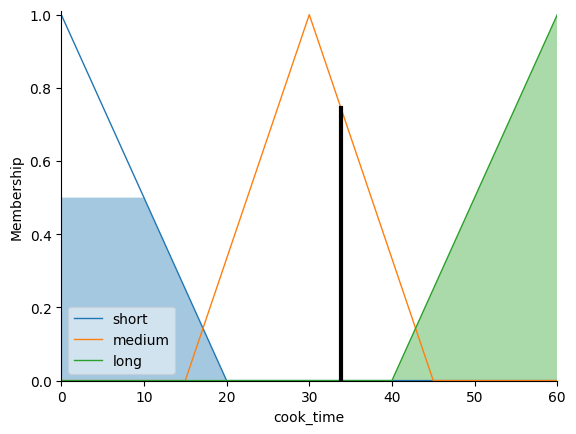

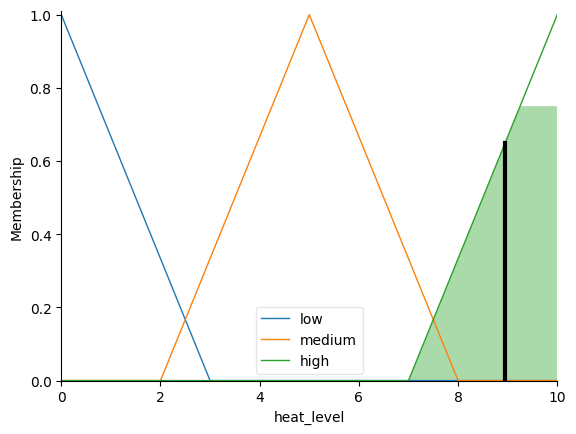

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
weight = ctrl.Antecedent(np.arange(0, 11, 1), 'weight')
init_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'init_temp')
water_content = ctrl.Antecedent(np.arange(0, 11, 1), 'water_content')

cook_time = ctrl.Consequent(np.arange(0, 61, 1), 'cook_time')
heat_level = ctrl.Consequent(np.arange(0, 11, 1), 'heat_level')

food_type['soft']   = fuzz.trimf(food_type.universe, [0, 0, 4])
food_type['medium'] = fuzz.trimf(food_type.universe, [3, 5, 7])
food_type['hard']   = fuzz.trimf(food_type.universe, [6, 10, 10])

weight['light']  = fuzz.trimf(weight.universe, [0, 0, 4])
weight['medium'] = fuzz.trimf(weight.universe, [3, 5, 7])
weight['heavy']  = fuzz.trimf(weight.universe, [6, 10, 10])

init_temp['cold'] = fuzz.trapmf(init_temp.universe, [0, 0, 15, 20])
init_temp['warm'] = fuzz.trimf(init_temp.universe, [15, 25, 35])
init_temp['hot']  = fuzz.trapmf(init_temp.universe, [30, 40, 60, 60])

water_content['low']    = fuzz.trimf(water_content.universe, [0, 0, 4])
water_content['medium'] = fuzz.trimf(water_content.universe, [3, 5, 7])
water_content['high']   = fuzz.trimf(water_content.universe, [6, 10, 10])

cook_time['short']  = fuzz.trimf(cook_time.universe, [0, 0, 20])
cook_time['medium'] = fuzz.trimf(cook_time.universe, [15, 30, 45])
cook_time['long']   = fuzz.trimf(cook_time.universe, [40, 60, 60])

heat_level['low']    = fuzz.trimf(heat_level.universe, [0, 0, 3])
heat_level['medium'] = fuzz.trimf(heat_level.universe, [2, 5, 8])
heat_level['high']   = fuzz.trimf(heat_level.universe, [7, 10, 10])

rule1 = ctrl.Rule(weight['light'], cook_time['short'])
rule2 = ctrl.Rule(weight['medium'], cook_time['medium'])
rule3 = ctrl.Rule(weight['heavy'], cook_time['long'])

rule4 = ctrl.Rule(food_type['soft'], heat_level['low'])
rule5 = ctrl.Rule(food_type['medium'], heat_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], heat_level['high'])

rule7 = ctrl.Rule(init_temp['cold'], cook_time['long'])
rule8 = ctrl.Rule(init_temp['warm'], cook_time['medium'])
rule9 = ctrl.Rule(init_temp['hot'],  cook_time['short'])

rule10 = ctrl.Rule(water_content['low'],  cook_time['short'])
rule11 = ctrl.Rule(water_content['medium'], cook_time['medium'])
rule12 = ctrl.Rule(water_content['high'], cook_time['long'])

rule13 = ctrl.Rule(weight['heavy'] & food_type['hard'] & init_temp['cold'],
                   (cook_time['long'], heat_level['high']))

rules = [rule1, rule2, rule3, rule4, rule5, rule6,
         rule7, rule8, rule9, rule10, rule11, rule12, rule13]
cooker_ctrl = ctrl.ControlSystem(rules)
cooker_sim  = ctrl.ControlSystemSimulation(cooker_ctrl)

cooker_sim.input['food_type']      = 9
cooker_sim.input['weight']         = 8
cooker_sim.input['init_temp']      = 5
cooker_sim.input['water_content']  = 2

cooker_sim.compute()

print("Thời gian nấu (phút):", cooker_sim.output['cook_time'])
print("Mức nhiệt (0..10):   ", cooker_sim.output['heat_level'])

cook_time.view(sim=cooker_sim)
heat_level.view(sim=cooker_sim)
